In [712]:
print('Importing Modules...')
#Importing Python Libraries (Basic)
import numpy as np
import pandas as pd #for data manipulation
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import StandardScaler

#Model Training
from sklearn.model_selection import train_test_split #to split training and testing data
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

#Model Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Importing modules complete...')

Importing Modules...
Importing modules complete...


In [713]:
print('Reading Data...')
data = pd.read_csv('heart.csv')
print('Read heart.csv successfully \n')

print('below are the number of null values in each column in the dataset')

check_null = data
check_null.isna().sum()

Reading Data...
Read heart.csv successfully 

below are the number of null values in each column in the dataset


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [714]:
data.shape

(303, 14)

In [715]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [716]:
#set column name
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']


#Conversion of data type
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 1] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 4] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 1] = 'upsloping'
data['st_slope'][data['st_slope'] == 2] = 'flat'
data['st_slope'][data['st_slope'] == 3] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

data['sex'] = data['sex'].astype('object')
data['chest_pain_type'] = data['chest_pain_type'].astype('object')
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].astype('object')
data['rest_ecg'] = data['rest_ecg'].astype('object')
data['exercise_induced_angina'] = data['exercise_induced_angina'].astype('object')
data['st_slope'] = data['st_slope'].astype('object')
data['thalassemia'] = data['thalassemia'].astype('object')

C:\Users\madhlk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\madhlk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\madhlk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [717]:
#Split Label and features
#x_data = features, y_label = label
data = pd.get_dummies(data, drop_first=True)
data.head()

x_data = data.drop(['target'],axis = 1)
x_data
y_label = data['target']

In [718]:
x_data.shape

(303, 19)

In [719]:
x_data.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,0,0,0,0,1,0,0,1,1,0,1,0,0


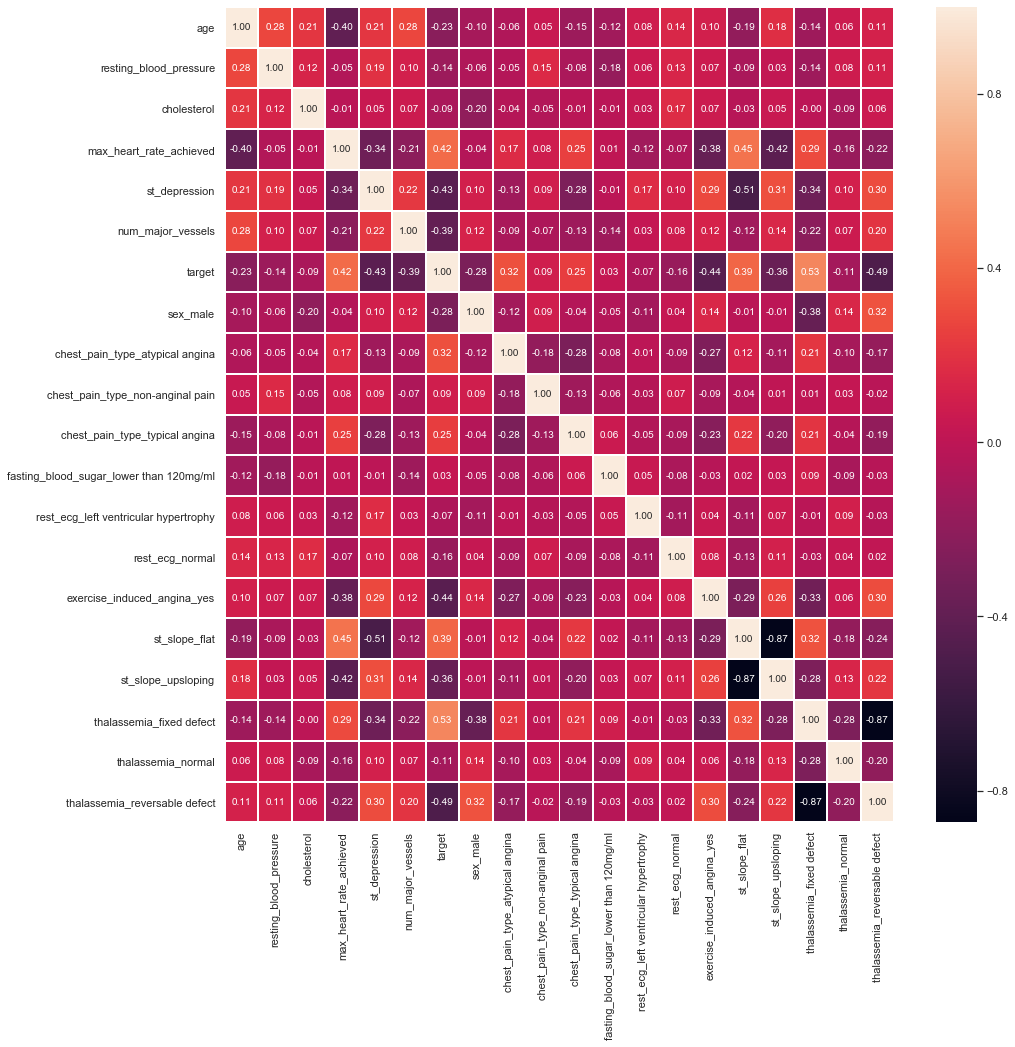

In [720]:
cor_matrix = data.corr()
fig, axis = plt.subplots(figsize=(15, 15))
axis = sns.heatmap(cor_matrix,
                 annot=True,
                 linewidths=1,
                 fmt=".2f")
ymin, ymax = axis.get_ylim()

In [721]:
#Split training and testing
x_train,x_test, y_train,y_test = train_test_split(x_data,y_label, test_size = 0.25) #80% training 20% test

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)


Shape of x_train : (227, 19)
Shape of x_test : (76, 19)
Shape of y_train : (227,)
Shape of y_test : (76,)


In [722]:
#Run Model 
rf = RandomForestClassifier(n_estimators = 100, random_state =42)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_pred


array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [738]:
importances = list(rf.feature_importances_)

fi= [(x_data,round(importance,2)) for x_data, importance in zip(x_data,importances)]
fi = sorted(fi,key = lambda x: x[1], reverse= True)

[print('Variable: {:20} -                             Importance: {}'.format(*pair)) for pair in fi];

Variable: num_major_vessels    -                             Importance: 0.15
Variable: st_depression        -                             Importance: 0.13
Variable: max_heart_rate_achieved -                             Importance: 0.1
Variable: age                  -                             Importance: 0.09
Variable: thalassemia_fixed defect -                             Importance: 0.09
Variable: cholesterol          -                             Importance: 0.08
Variable: resting_blood_pressure -                             Importance: 0.07
Variable: thalassemia_reversable defect -                             Importance: 0.07
Variable: exercise_induced_angina_yes -                             Importance: 0.04
Variable: sex_male             -                             Importance: 0.03
Variable: chest_pain_type_atypical angina -                             Importance: 0.03
Variable: st_slope_flat        -                             Importance: 0.03
Variable: chest_pain_type_non

In [724]:
#Accuracy
print("Training Accuracy :",round(rf.score(x_train, y_train) *100), '%')
print("Testing Accuracy :", round(rf.score(x_test, y_test)*100),'%')

Training Accuracy : 100.0 %
Testing Accuracy : 84.0 %


In [725]:
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.16 degrees.


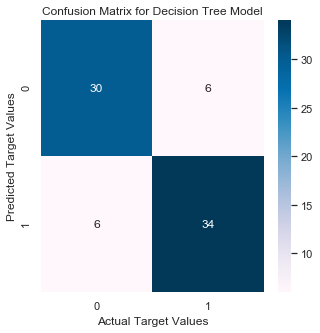

In [737]:
#Confusion Matrix
cm =confusion_matrix(y_test,y_pred )
sns.set()
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'PuBu')
plt.title('Confusion Matrix for Decision Tree Model', y = 1.1)
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.show()

In [727]:
#Classification Report 
clf_report = classification_report(y_test,y_pred,target_names=["Has Heart Disease","No Heart Disease"])
print(clf_report)

                   precision    recall  f1-score   support

Has Heart Disease       0.83      0.83      0.83        36
 No Heart Disease       0.85      0.85      0.85        40

         accuracy                           0.84        76
        macro avg       0.84      0.84      0.84        76
     weighted avg       0.84      0.84      0.84        76



In [728]:
#Decision Tree creation and export (for report)
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
tree_dot = StringIO()
estimator = rf.estimators_[1]


feature_names = [i for i in x_train.columns]

export_graphviz(estimator, out_file=tree_dot, 
                feature_names = feature_names,
                rounded = True, 
                precision = 1)


In [729]:
graph = pydotplus.graph_from_dot_data(tree_dot.getvalue())

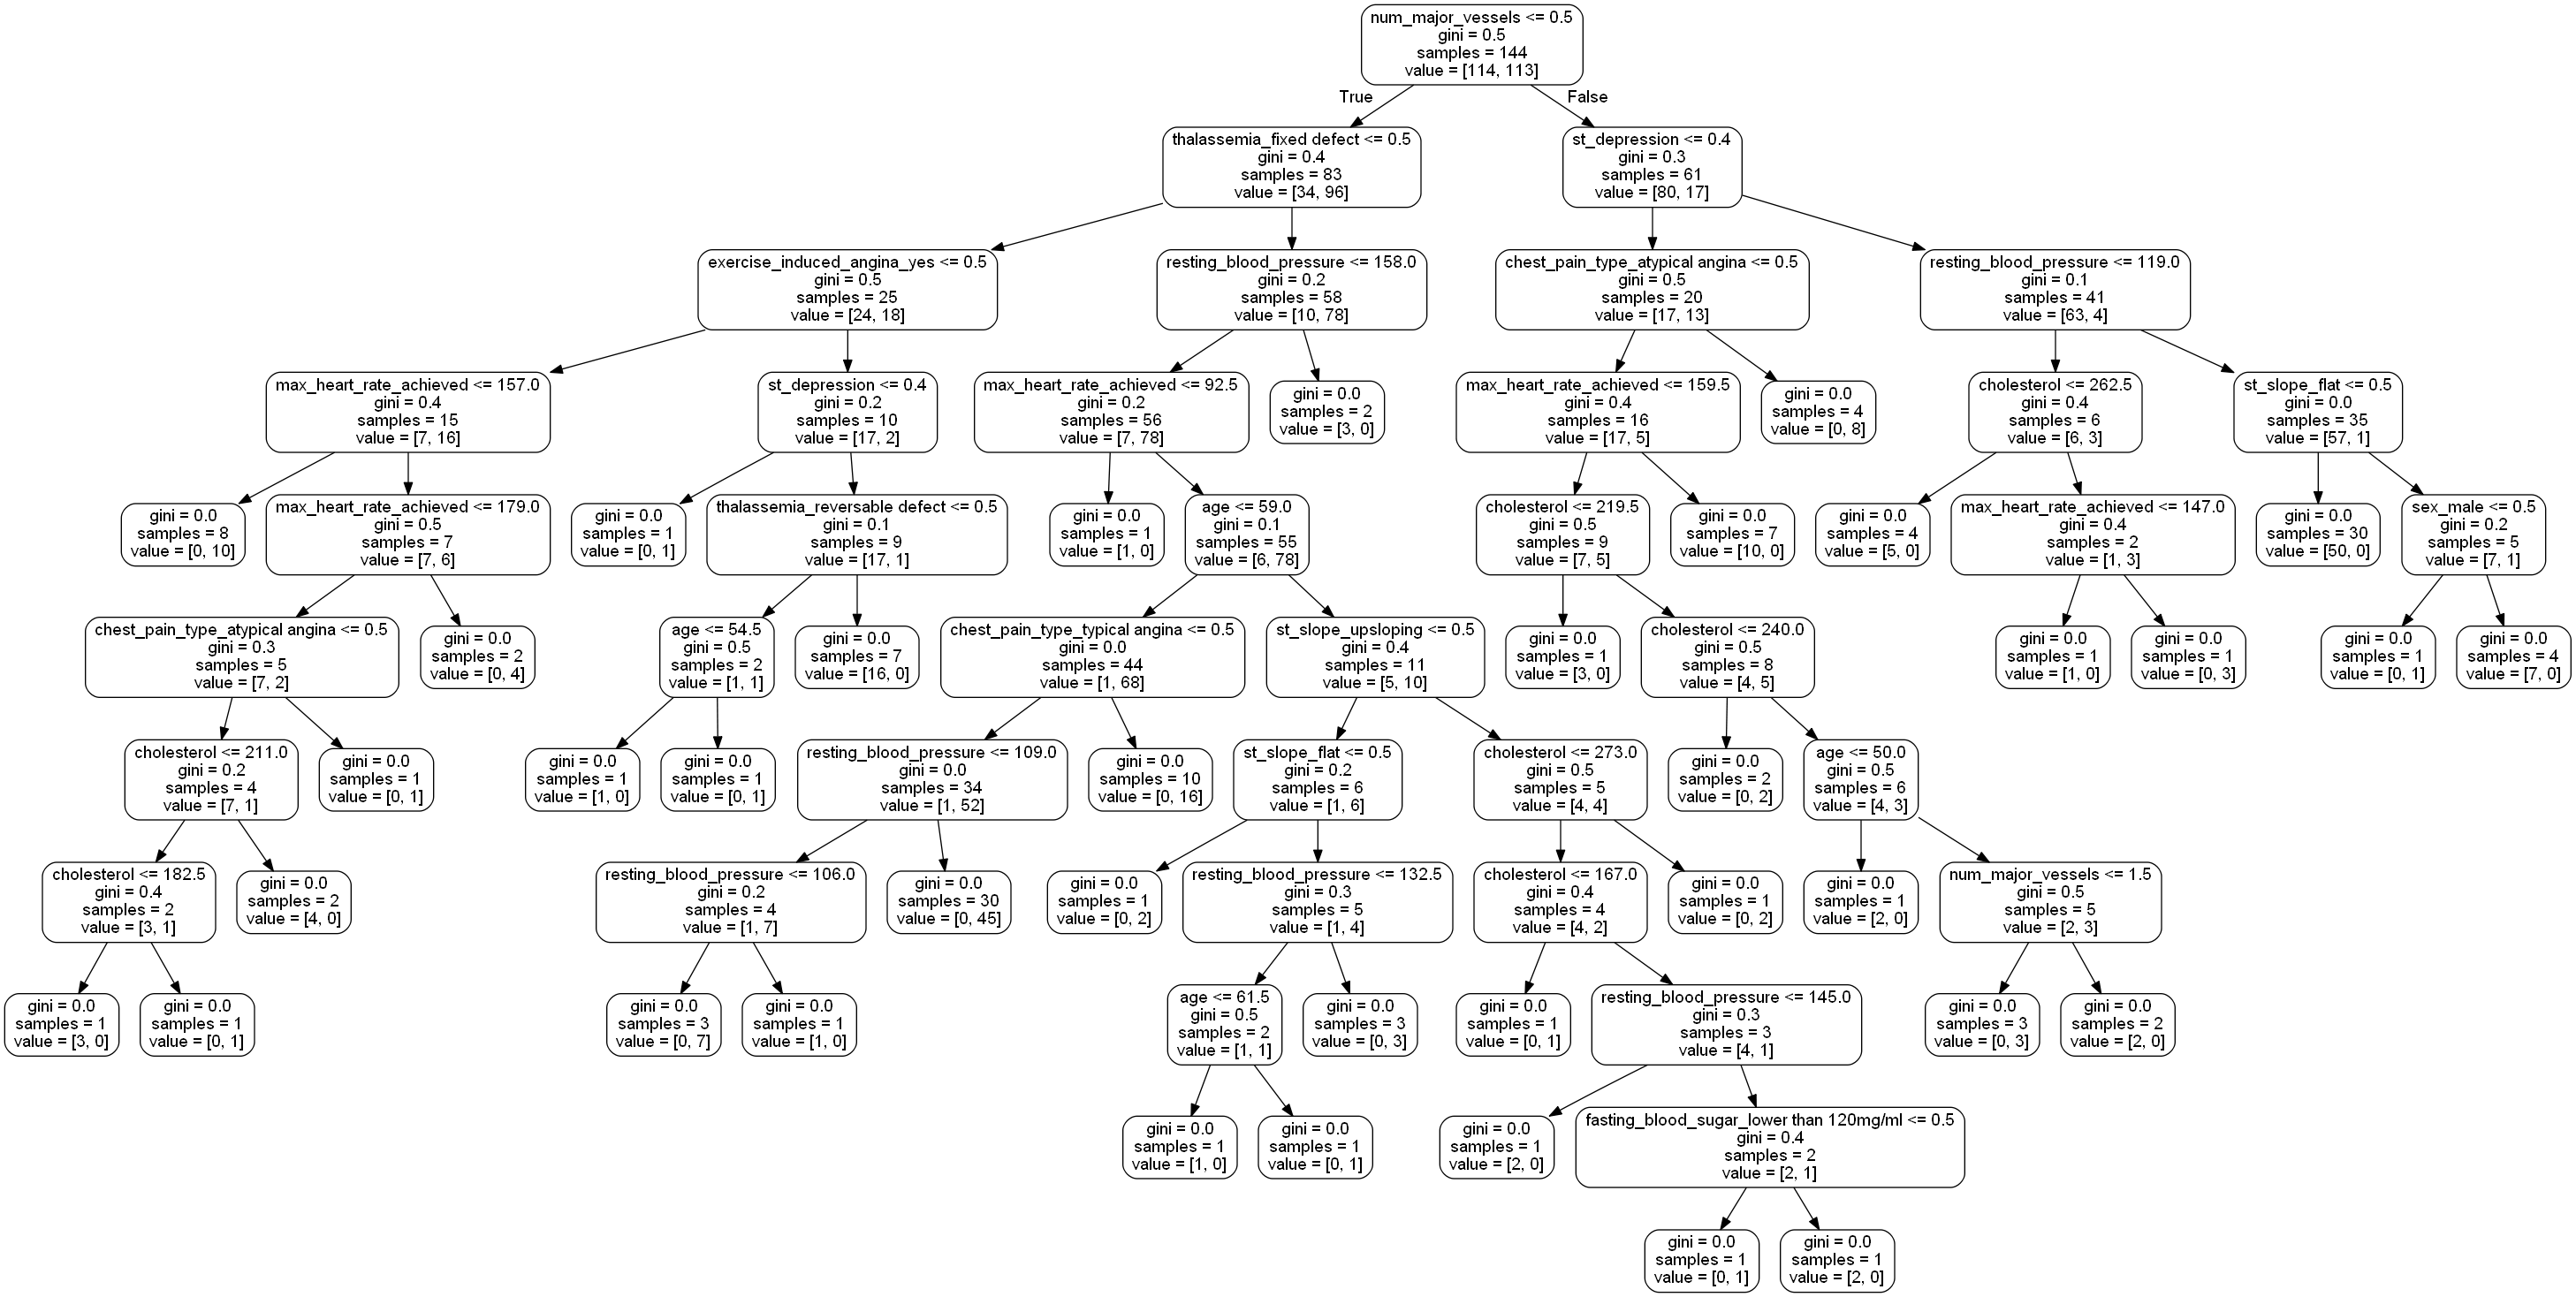

In [730]:
Image(graph.create_png())